In [1]:
#!py -m pip install --upgrade pip

In [2]:
#!pip install jinja2

In [3]:
#!pip install pycaret

In [4]:
#!pip install sklearn

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
#### 데이터 불러오기 (var : 질병에 영향을 미칠 변수들 / dic : 유병여부 변수)
var = pd.read_csv('C:/sas_view/use_code/Data_Preprocessing/data/final_df.csv',index_col=0)
dic = pd.read_csv('C:/sas_view/use_code/Data_Preprocessing/data/pr_dg_pe.csv',index_col=0) 

In [7]:
dic.loc[:,'DC4_PR'].value_counts()

0.0    49
1.0    34
Name: DC4_PR, dtype: int64

옵션 값 설명
* test_size: 테스트 셋 구성의 비율을 나타냅니다. 
    * train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 
    * 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. 
    * default 값(빈칸으로 두면)은 0.25 입니다.
#
* shuffle: default=True 입니다. 
    * split을 해주기 이전에 섞을건지 여부입니다. 
    * 보통은 default 값으로 놔둡니다.
#
* stratify: default=None 입니다. 
    * classification을 다룰 때 매우 중요한 옵션값입니다. 
    * stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 +  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
#   
* random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.

In [8]:
### 1. 데이터 생성
#### X : 독립변수 / Y : 종속변수_유병여부
X = var 
Y = dic.loc[:,['ID','DC4_PR']] ## 뇌졸중 유병여부

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.4,  # test set 40%의 비율로
                                                    shuffle=True, # 무작위 추출(random sampling, shuffle=True)하여 분할
                                                    random_state=1004) # 재현가능(for reproducibility)하도록 난수의 초기값을 설정해주는 것 (아무 숫자 넣어도 됨)

In [9]:
train = X_train.merge(y_train)
train

,ID,SEX,AGE,HE_HT,HE_WT,HE_BMI,LQ_3EQL,LQ_4EQL,LQ_5EQL,BO1_1,...,BP_PHQ_6,BP_PHQ_7,BP_PHQ_8,BP_PHQ_9,MH_PHQ_S,LF_BUYER,HE_FH,HE_SBP,HE_DBP,DC4_PR
0,b'G751373401',1,66,167.8,65.4,23.227038,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,158.0,86.0,NaN
1,b'K652177901',2,80,142.7,50.9,24.995961,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,126.0,75.0,NaN
2,b'A736020402',2,71,152.6,64.5,27.698143,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
3,b'G753268001',1,66,165.0,58.9,21.634527,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,117.0,71.0,NaN
4,b'A804319002',2,70,161.9,60.5,23.081375,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,5.0,1.0,1.0,125.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,b'H637439701',1,78,165.7,63.6,23.163922,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,116.0,68.0,NaN
5037,b'J606196601',1,70,161.8,53.9,20.588833,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,104.0,58.0,NaN
5038,b'O803315601',2,78,NaN,57.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,134.0,68.0,NaN
5039,b'R802210201',1,66,162.8,83.7,31.580329,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,143.0,85.0,NaN


In [10]:
test = X_test.merge(y_test)
test

,ID,SEX,AGE,HE_HT,HE_WT,HE_BMI,LQ_3EQL,LQ_4EQL,LQ_5EQL,BO1_1,...,BP_PHQ_6,BP_PHQ_7,BP_PHQ_8,BP_PHQ_9,MH_PHQ_S,LF_BUYER,HE_FH,HE_SBP,HE_DBP,DC4_PR
0,b'E805402301',1,80,161.4,55.4,21.266827,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,112.0,65.0,NaN
1,b'A722029303',2,80,144.1,47.4,22.827081,1.0,2.0,1.0,1.0,...,0.0,0.0,1.0,0.0,5.0,1.0,1.0,134.0,54.0,NaN
2,b'B812392101',1,74,171.2,76.8,26.203162,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,128.0,81.0,NaN
3,b'J653254406',1,76,160.2,63.1,24.586932,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,NaN,0.0,123.0,67.0,NaN
4,b'A708024905',2,65,162.6,59.4,22.467014,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,132.0,75.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,b'H639208502',2,80,147.6,52.4,24.052409,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,127.0,56.0,NaN
3358,b'N710034901',2,80,145.3,44.6,21.125336,1.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,147.0,70.0,NaN
3359,b'H815217001',1,71,169.0,68.7,24.053780,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,128.0,80.0,NaN
3360,b'E756278201',1,70,176.3,73.5,23.647363,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,124.0,73.0,NaN


In [11]:
import pycaret
print(pycaret.__version__)

2.3.10


In [12]:
### 2. 라이브러리를 실행시키고, setup 메소드 실행
from pycaret.classification import *
setup_clf = setup(data=train, target='DC4_PR')

,Description,Value
0,session_id,8219
1,Target,DC4_PR
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(5041, 42)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,33
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
### 3. 다양한 모델들과의 성능 비교 (8번으로 바로 넘어가도 무관)
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0160
dummy,Dummy Classifier,0.6167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
lda,Linear Discriminant Analysis,0.5750,0.5750,0.3500,0.2667,0.2800,0.0200,0.0577,0.0070
gbc,Gradient Boosting Classifier,0.5417,0.5125,0.3500,0.3500,0.3333,0.0300,0.0077,0.0310
rf,Random Forest Classifier,0.5167,0.5500,0.0000,0.0000,0.0000,-0.1300,-0.1500,0.1050
knn,K Neighbors Classifier,0.4833,0.3250,0.1000,0.0333,0.0500,-0.1500,-0.1500,0.0130
svm,SVM - Linear Kernel,0.4833,0.0000,0.5000,0.1833,0.2667,0.0400,0.0500,0.0060
qda,Quadratic Discriminant Analysis,0.4833,0.5000,0.5000,0.2833,0.3500,0.0100,0.0000,0.0090
nb,Naive Bayes,0.4750,0.4500,0.3500,0.2167,0.2333,-0.0600,-0.0423,0.0070
lr,Logistic Regression,0.4500,0.4250,0.4000,0.2333,0.2833,-0.0500,-0.0500,1.1110


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8219, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
### 4. 모델 생성 create_model('모델 약어')
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.6667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
3,0.6667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
5,0.6667,0.7500,1.0000,0.5000,0.6667,0.4000,0.5000
6,0.3333,0.2500,0.0000,0.0000,0.0000,-0.5000,-0.5000
7,0.3333,0.2500,0.0000,0.0000,0.0000,-0.5000,-0.5000
8,0.3333,0.2500,0.0000,0.0000,0.0000,-0.5000,-0.5000


In [15]:
### 5. 모델 튜닝
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.3333,0.0000,1.0000,0.3333,0.5000,0.0000,0.0000
3,0.6667,0.7500,1.0000,0.5000,0.6667,0.4000,0.5000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.6667,0.7500,1.0000,0.5000,0.6667,0.4000,0.5000
8,0.3333,0.5000,0.0000,0.0000,0.0000,-0.5000,-0.5000


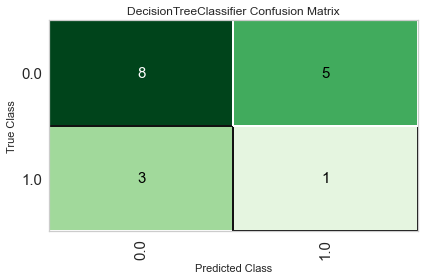

In [16]:
### 6. AUC 곡선 / 오차 행렬
plot_model(estimator = tuned_dt, plot = 'auc')
plot_model(estimator = tuned_dt, plot = 'confusion_matrix')

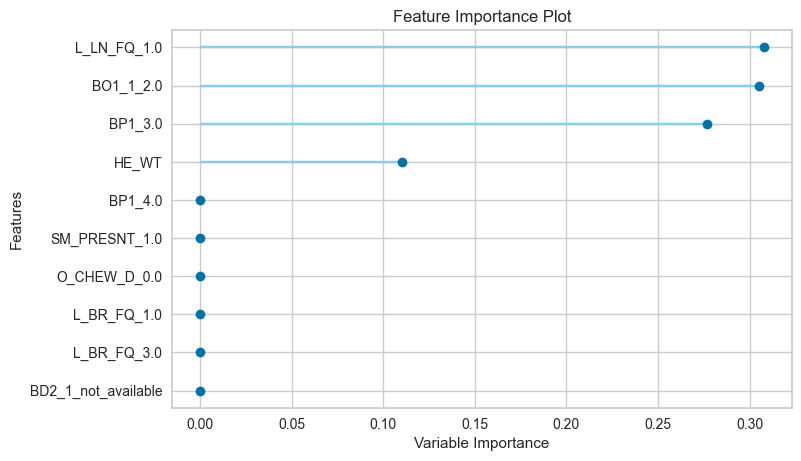

In [17]:
### 7. Feature Importance
plot_model(estimator = tuned_dt, plot = 'feature')

In [18]:
### 8. 모델 평가 (4~7번을 뛰어넘고 evaluate_model(best) 사용해도 무관)
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
### best사용
#evaluate_model(best)

In [20]:
# 데이터 프레임 모든 행, 열 출력
#pd.set_option('display.max_columns',None) # 모든 열을 보고자 할 때
#pd.set_option('display.max_rows',None) # 모든 행을 보고자 할 때

In [21]:
### 9-1. 예측 (모델 선정했을 시)
dt_final = finalize_model(tuned_dt)
predict_model(dt_final,test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0,0,0,0,0,0,0


,ID,SEX,AGE,HE_HT,HE_WT,HE_BMI,LQ_3EQL,LQ_4EQL,LQ_5EQL,BO1_1,...,BP_PHQ_8,BP_PHQ_9,MH_PHQ_S,LF_BUYER,HE_FH,HE_SBP,HE_DBP,DC4_PR,Label,Score
0,b'E805402301',1,80,161.4,55.4,21.266827,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,112.0,65.0,NaN,1.0,0.5556
1,b'A722029303',2,80,144.1,47.4,22.827081,1.0,2.0,1.0,1.0,...,1.0,0.0,5.0,1.0,1.0,134.0,54.0,NaN,0.0,0.8000
2,b'B812392101',1,74,171.2,76.8,26.203162,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,128.0,81.0,NaN,1.0,0.5556
3,b'J653254406',1,76,160.2,63.1,24.586932,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,NaN,0.0,123.0,67.0,NaN,0.0,0.8000
4,b'A708024905',2,65,162.6,59.4,22.467014,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,132.0,75.0,NaN,1.0,0.5556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,b'H639208502',2,80,147.6,52.4,24.052409,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,2.0,0.0,127.0,56.0,NaN,1.0,0.6154
3358,b'N710034901',2,80,145.3,44.6,21.125336,1.0,2.0,1.0,3.0,...,0.0,0.0,4.0,1.0,0.0,147.0,70.0,NaN,1.0,0.6154
3359,b'H815217001',1,71,169.0,68.7,24.053780,2.0,2.0,1.0,1.0,...,0.0,0.0,2.0,1.0,1.0,128.0,80.0,NaN,1.0,0.6154
3360,b'E756278201',1,70,176.3,73.5,23.647363,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,1.0,1.0,124.0,73.0,NaN,0.0,0.8889


In [22]:
### 9-2. 예측 (모델 선정X)
predictions = predict_model(best,X_test) 

In [23]:
predictions

,ID,SEX,AGE,HE_HT,HE_WT,HE_BMI,LQ_3EQL,LQ_4EQL,LQ_5EQL,BO1_1,...,BP_PHQ_7,BP_PHQ_8,BP_PHQ_9,MH_PHQ_S,LF_BUYER,HE_FH,HE_SBP,HE_DBP,Label,Score
7258,b'E805402301',1,80,161.4,55.4,21.266827,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,112.0,65.0,0.0,0.6129
3485,b'A722029303',2,80,144.1,47.4,22.827081,1.0,2.0,1.0,1.0,...,0.0,1.0,0.0,5.0,1.0,1.0,134.0,54.0,0.0,0.6129
7084,b'B812392101',1,74,171.2,76.8,26.203162,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,128.0,81.0,0.0,0.6129
1040,b'J653254406',1,76,160.2,63.1,24.586932,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,NaN,0.0,123.0,67.0,0.0,0.6129
3368,b'A708024905',2,65,162.6,59.4,22.467014,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,132.0,75.0,0.0,0.6129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,b'H639208502',2,80,147.6,52.4,24.052409,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,0.0,127.0,56.0,0.0,0.6129
4775,b'N710034901',2,80,145.3,44.6,21.125336,1.0,2.0,1.0,3.0,...,0.0,0.0,0.0,4.0,1.0,0.0,147.0,70.0,0.0,0.6129
7504,b'H815217001',1,71,169.0,68.7,24.053780,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,128.0,80.0,0.0,0.6129
5612,b'E756278201',1,70,176.3,73.5,23.647363,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,1.0,1.0,124.0,73.0,0.0,0.6129


In [24]:
predict_model(best,test) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0,0,0,0,0,0


,ID,SEX,AGE,HE_HT,HE_WT,HE_BMI,LQ_3EQL,LQ_4EQL,LQ_5EQL,BO1_1,...,BP_PHQ_8,BP_PHQ_9,MH_PHQ_S,LF_BUYER,HE_FH,HE_SBP,HE_DBP,DC4_PR,Label,Score
0,b'E805402301',1,80,161.4,55.4,21.266827,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,112.0,65.0,NaN,0.0,0.6129
1,b'A722029303',2,80,144.1,47.4,22.827081,1.0,2.0,1.0,1.0,...,1.0,0.0,5.0,1.0,1.0,134.0,54.0,NaN,0.0,0.6129
2,b'B812392101',1,74,171.2,76.8,26.203162,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,128.0,81.0,NaN,0.0,0.6129
3,b'J653254406',1,76,160.2,63.1,24.586932,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,NaN,0.0,123.0,67.0,NaN,0.0,0.6129
4,b'A708024905',2,65,162.6,59.4,22.467014,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,132.0,75.0,NaN,0.0,0.6129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,b'H639208502',2,80,147.6,52.4,24.052409,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,2.0,0.0,127.0,56.0,NaN,0.0,0.6129
3358,b'N710034901',2,80,145.3,44.6,21.125336,1.0,2.0,1.0,3.0,...,0.0,0.0,4.0,1.0,0.0,147.0,70.0,NaN,0.0,0.6129
3359,b'H815217001',1,71,169.0,68.7,24.053780,2.0,2.0,1.0,1.0,...,0.0,0.0,2.0,1.0,1.0,128.0,80.0,NaN,0.0,0.6129
3360,b'E756278201',1,70,176.3,73.5,23.647363,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,1.0,1.0,124.0,73.0,NaN,0.0,0.6129


In [26]:
pd.DataFrame({'y_test' : y_test.loc[:,'DC4_PR'],
              'label' : predictions.loc[:,'Label']})

,y_test,label
7258,NaN,0.0
3485,NaN,0.0
7084,NaN,0.0
1040,NaN,0.0
3368,NaN,0.0
...,...,...
2560,NaN,0.0
4775,NaN,0.0
7504,NaN,0.0
5612,NaN,0.0
